In [2]:
# Lectura de Datos.

import pandas as pd
df = pd.read_csv('ipsaCompleto.csv')

In [3]:
# Función para graficar el valor del IPSA en el tiempo.
# Si no se le incluyen fechas de inicio y término, grafica todo el tiempo que se tenga datos
# Los datos son desde 1993-09-27 hasta el presente

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def graficoIPSA(df, startDate=None, endDate=None):
    if startDate:
        df = df[df['Fecha'] >= startDate]
    if endDate:
        df = df[df['Fecha'] <= endDate]


    # Se asegura de que el formato de la fecha esté correcto
    df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
    df = df.dropna(subset=['Fecha'])
    df = df.sort_values(by='Fecha')


    # Hace el gráfico
    plt.figure(figsize=(12, 6))
    plt.plot(df['Fecha'], df['Valor IPSA'],
            label='Valor IPSA',
            color='green',
            linewidth=2)

    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    plt.xlim(df['Fecha'].min(), df['Fecha'].max())

    plt.xlabel("Fecha")
    plt.ylabel("Valor IPSA")
    plt.title('Valor IPSA en el tiempo')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

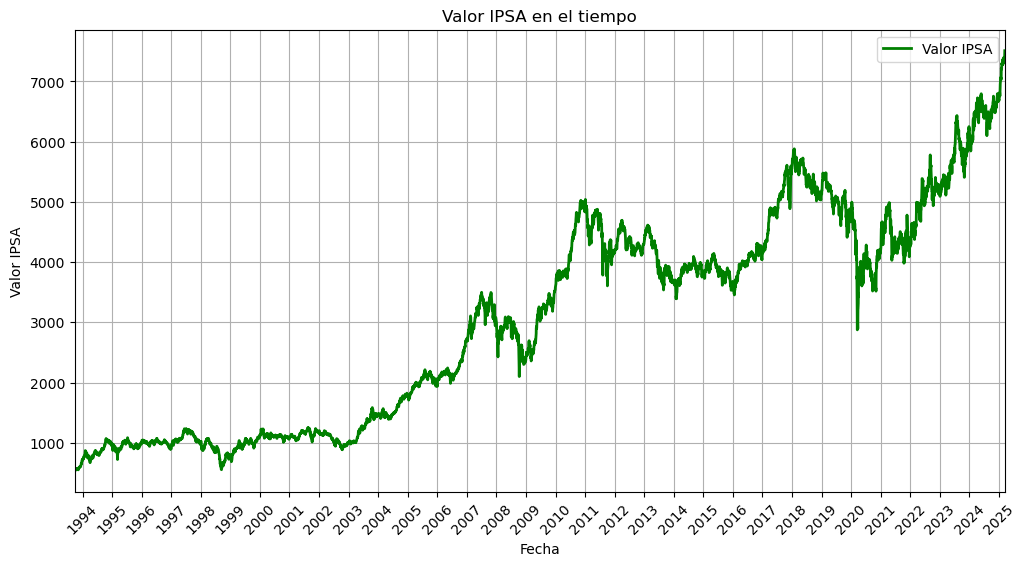

In [4]:
graficoIPSA(df)